In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 500)
#pd.set_option('display.width', 1000)
import matplotlib.pyplot as plt
import seaborn as sns
import pyreadr

In [2]:
data_path = '/Users/simonneumeyer/Dropbox/Ethiopia IE - Road Safety/Data/'
crashes_path = 'ETRE - Crashes/'
final_crash_file = 'FinalData/crashes.dta'
raw_crash_folder = 'RawData/'
raw_data_file = 'AAE Crush Research Data.xlsx'

traffic_path = 'ETRE - Traffic/'
final_traffic_file = 'FinalData/traffic.Rds'

## Crashes

### exploration

In [3]:
raw_crash_2015 = pd.read_excel(data_path + crashes_path + raw_crash_folder + '2015 ' + raw_data_file)
raw_crash_2016 = pd.read_excel(data_path + crashes_path + raw_crash_folder + '2016 ' + raw_data_file)
raw_crash_2017 = pd.read_excel(data_path + crashes_path + raw_crash_folder + '2017 ' + 'AAE Crush  Research Data.xlsx')

In [4]:
raw_crash_2015.describe()

,Case No,Vehicle Type (V),Owner,Driver Age,Address,Drivers License level,License year,License region,Experience,relation with vehicle,Ownership,Extent of Damage
count,242.000000,280.000000,0.0,83.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,84.004132,2.657143,NaN,33.891566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,41.532320,2.020580,NaN,7.856972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,NaN,22.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,51.250000,1.000000,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,85.500000,2.000000,NaN,33.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,115.750000,4.000000,NaN,37.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,164.000000,7.000000,NaN,65.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
print(len(raw_crash_2015.columns))
print(len(raw_crash_2016.columns))
print(len(raw_crash_2017.columns))

30
29
31


In [6]:
#
#print(set(raw_crash_2015.columns) - set(raw_crash_2016.columns))
#print(set(raw_crash_2016.columns) - set(raw_crash_2015.columns))
#print('Road Geometry missing in 2016\n')

#print(set(raw_crash_2017.columns) - set(raw_crash_2015.columns))
#print(set(raw_crash_2015.columns) - set(raw_crash_2017.columns))
print('end of accident time missing in 2015\n')

#print(set(raw_crash_2017.columns) - set(raw_crash_2016.columns))
#print(set(raw_crash_2016.columns) - set(raw_crash_2017.columns))
print('Road Geometry & end of accident time missing in 2016\n')

end of accident time missing in 2015

Road Geometry & end of accident time missing in 2016



In [7]:
crashes_final = pd.read_stata(data_path + crashes_path + final_crash_file)
#crashes_final.head()

### todos from R file:

TODO: If "night" but hour is "1", should this be "am"?


In [8]:
raw_crash_2017[raw_crash_2017['Time of Accident'].astype(str).str.contains('01፡')]

,Case No,Accident Date,Day,Time of Accident,HASHED Plate Number,Vehicle Type (V),Vehicle Brand,Accident Location,Direction,Road Geometry,Road,Weather,Fatality,Serious Injury,Light Injury,Cause of Accident,Type of accident,Year of Production,Owner,Driver Age,Gender,Address,Drivers License level,License year,License region,Experience,relation with vehicle,end of accident time,ETRE Asset Damage,Ownership,Extent of Damage
7,0159,2017-01-16,Monday,01፡30 Night,0x35064F50C9E0F49EB3B7C14EC4BC8F93,1.0,Pick up,10+090,To Adama,Escarpy,Dry,Normal,NaN,NaN,NaN,Pedestrian,Crush,NaN,Company,43,M,Adama,3rd,1994,Oromia,15 year,Employee,NaN,NaN,NaN,NaN
22,0173,2017-02-03,Friday,01፡50Morning,0x96B22F6A895032C4F5CE0024CCFCF53A,3.0,Isuzu,36+220,To Addis Abeba,Flat,Dry,Normal,NaN,NaN,NaN,NaN,NaN,2013,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,0188,2017-02-21,Tuesday,01፡30Evening,0x187C725FD9C0DF3D6D126DC309F166D9,2.0,Dolphine,17+340,To Addis Abeba,Flat,Dry,Cold,NaN,NaN,NaN,Animals crossing,Crush,2003,Private,43,M,Addis Ababa,3rd,1999,Addis Ababa,10 year,Owner,NaN,NaN,NaN,NaN
48,0194A,2017-02-27,Monday,01፡15Morning,0xE89132B9ED645F150DE4FA9766060C3F,1.0,Pick up,3+060,To Addis Abeba,Escarpy,Wet,Normal,NaN,NaN,NaN,Unethical driving,Cehicles collision,NaN,Government,38,M,Addis Ababa,NaN,NaN,NaN,NaN,Employee,01፡20,NaN,NaN,NaN
49,0194B,2017-02-27,Monday,01፡15,0x0DF3BB6BB2B3608849AE2BD8B8440AF8,4.0,Sino Truck,3+060,To Adama,Uphill,Dry,Normal,NaN,NaN,NaN,Unethical Driving,Crush,NaN,Private,39,M,Addis Ababa,Truck-2,2000,Oromia,15 year,Employee,03፡20Evening,NaN,NaN,NaN
52,0197,2017-03-05,Sunday,01፡00Morning,0xE93B3DB9620617018135973545EC139E,1.0,Corolla,21+600,To Addis Abeba,Flat,Dry,Normal,NaN,NaN,NaN,Crush,NaN,NaN,Company,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12፡00,NaN,NaN,NaN
76,217,2017-04-03,Monday,01፡20 Morning,0xEEAEF69431FB8A015C41B1805845ACF2,2.0,High Roof,59+620,To Addis Abeba,Uphill,Dry,Normal,NaN,NaN,NaN,Unethical driving,Vehicles collision,NaN,NaN,26,M,Asela,3rd,1999,Oromia,10 year,Employee,01፡50 Morning,NaN,NaN,NaN
86,224,2017-04-15,Saturday,01፡20 Morning,0xD67C609815613E378A2CDA8B79972225,3.0,Isuzu,k-52,To Modjo,curvy,NaN,Cold,NaN,NaN,NaN,Over speeding,Crush,2015,Private,24,M,Qoqa,5th,2009,Oromia,4 Month,Other,01፡45 Morning,NaN,NaN,NaN
92,229,2017-04-22,Saturday,01፡50 Night Time,0x5BF1473D8EDDD6A8CED7BC60516139A7,1.0,Vitz,7+970,To Adama,Flat,Dry,Normal,NaN,NaN,NaN,Over speeding,Overthrow,NaN,Private,30,M,Bishoftu,public-1,2009,Oromia,3 Month,Other,02፡30Night Time,NaN,NaN,NaN
106,240,2017-04-30,Sunday,01፡30 Morning,0x5AF1E643EDB72A733D21704CF6C39D77,1.0,Vitz,27+080,To Addis Abeba,Flat,Dry,Normal,1,3,NaN,Loose Brake,Overthrow,NaN,Private,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06፡20 Day Time,NaN,NaN,NaN


In [9]:
#raw_crash_2017[raw_crash_2017['Cause of Accident'].astype(str).str.contains('Drunk')]

Most of the accidents at '01:*' are associated with 'Morning', which is probably pm, since there is much more traffic at 1pm than at 1 am. Therefore it seems reasonable to assume that 'night' and 'evening' are both am.
It doesn't really matter, since it's not only a few data points (night: 2, evening: 1)

### Location:

In [10]:
#import pyreadr
#pyreadr.read_r(data_path + 'Addis Adama Expressway/Data/expressway/addis_adama_express.Rds')

expressway data:

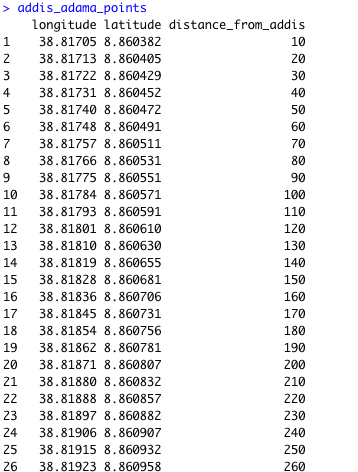

In [11]:
#raw_crash_2017['Accident Location']

In [12]:
unmatched_locations = crashes_final[crashes_final.distance_from_addis.isnull()].accident_location
pct_empty_locs = unmatched_locations.value_counts(normalize=True)[0]
unmatched_locations.value_counts(normalize=True)

                        0.326154
52 curve                0.027692
k-2 ex-9                0.024615
78 curve                0.024615
k-2 ex-3                0.015385
k-2 exit 9              0.012308
k-2 exit 1              0.012308
k-52 ex-1               0.012308
k-2 ex-8                0.012308
k-52 eixt curve         0.009231
k-64                    0.009231
60b                     0.009231
k- 2 exit 3             0.009231
k-52                    0.009231
64 exit-7               0.006154
k-2exit-9               0.006154
k- 2 exit 2             0.006154
k2-ex-1                 0.006154
k52 curvy               0.006154
k2 ex-9                 0.006154
k- 2                    0.006154
64 exit 7               0.006154
64 lay by               0.006154
k2 exit-4               0.006154
k-2exit-7               0.006154
k-2 ex-7                0.006154
k-78                    0.006154
k-2exit-1               0.006154
k- 52 curve             0.006154
k-64 ex7                0.006154
ኬ-52      

In [13]:
pct_unmatched_locs = len(unmatched_locations)/len(crashes_final)
print(f'{round(100*pct_unmatched_locs,2)}% of the locations are unmatched!')

28.86% of the locations are unmatched!


In [14]:
pct_empty_locs
print(f'{round(100*pct_empty_locs,2)}% of the unmatched locations are empty-valued!')
red_pct_unmatched_locs = pct_unmatched_locs*(1-pct_empty_locs)
print(f'This leaves us with {round(100*red_pct_unmatched_locs,2)}% of locations unmatched that we could potentially fill.')


32.62% of the unmatched locations are empty-valued!
This leaves us with 19.45% of locations unmatched that we could potentially fill.


In [15]:
len_non_empty = unmatched_locations.value_counts()[1:].sum()

# 79 of the unmatched locations are on kilometer 2:
match_1 = unmatched_locations.str.contains('k-2')
match_2 = unmatched_locations.str.contains('k- 2')
match_3 = unmatched_locations.str.contains('k2')
match_4 = unmatched_locations.str.contains('k 2')

loc_2 = len(unmatched_locations[match_1|match_2|match_3|match_4]) / len_non_empty
print(f'{round(100*loc_2,2)}% of the unmatched locations are on kilometer 2!')

# 38 of the unmatched locations are on kilometer 52:
loc_52 = unmatched_locations.str.contains('52').sum() / len_non_empty
print(f'{round(100*loc_52,2)}% of the unmatched locations are on kilometer 52!')

# kilometer 78:
loc_78 = unmatched_locations.str.contains('78').sum() / len_non_empty
print(f'{round(100*loc_78,2)}% of the unmatched locations are on kilometer 78!')

# kilometer 16:
loc_16 = unmatched_locations.str.contains('16').sum() / len_non_empty
print(f'{round(100*loc_16,2)}% of the unmatched locations are on kilometer 52!')


36.07% of the unmatched locations are on kilometer 2!
17.35% of the unmatched locations are on kilometer 52!
6.85% of the unmatched locations are on kilometer 78!
7.31% of the unmatched locations are on kilometer 52!


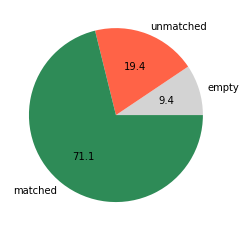

219 unmatched, non-empty locations.


In [16]:
labels = ['empty', 'unmatched', 'matched']
colors = ['lightgrey', 'tomato', 'seagreen']
values = [pct_unmatched_locs - red_pct_unmatched_locs, red_pct_unmatched_locs, 1-pct_unmatched_locs]
plt.pie(values, labels=labels, colors=colors, autopct=lambda x: round(x, 1))
plt.show()
print(f'{len_non_empty} unmatched, non-empty locations.')

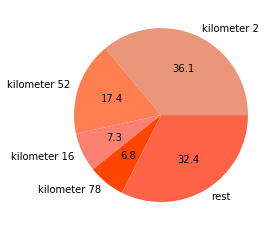

In [17]:
labels = ['kilometer 2', 'kilometer 52', 'kilometer 16', 'kilometer 78', 'rest']
colors = ['darksalmon', 'coral', 'salmon', 'orangered', 'tomato']
values = [loc_2, loc_52, loc_16, loc_78, 1-loc_2-loc_52-loc_16-loc_78]
plt.pie(values, labels=labels, colors=colors, autopct=lambda x: round(x, 1))
plt.show()

Let's see whether the same distribution holds for the matched ones:

0.37% of the matched locations are on kilometer 2!
1.25% of the unmatched locations are on kilometer 52!
0.37% of the unmatched locations are on kilometer 78!
0.87% of the unmatched locations are on kilometer 52!


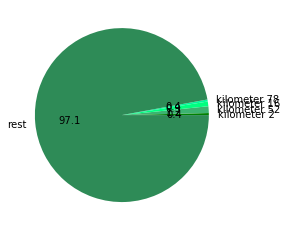

In [18]:
matched_locations = crashes_final[~crashes_final.distance_from_addis.isnull()].accident_location
#matched_locations.value_counts(normalize=True)

# 79 of the unmatched locations are on kilometer 2:
match_1 = matched_locations.str.startswith('2+')

loc_2 = len(matched_locations[match_1]) / len(matched_locations)
print(f'{round(100*loc_2,2)}% of the matched locations are on kilometer 2!')

# 38 of the unmatched locations are on kilometer 52:
loc_52 = matched_locations.str.startswith('52+').sum() / len(matched_locations)
print(f'{round(100*loc_52,2)}% of the unmatched locations are on kilometer 52!')

# kilometer 78:
loc_78 = matched_locations.str.startswith('78+').sum() / len(matched_locations)
print(f'{round(100*loc_78,2)}% of the unmatched locations are on kilometer 78!')

# kilometer 16:
loc_16 = matched_locations.str.startswith('16+').sum() / len(matched_locations)
print(f'{round(100*loc_16,2)}% of the unmatched locations are on kilometer 52!')

labels = ['kilometer 2', 'kilometer 52', 'kilometer 16', 'kilometer 78', 'rest']
colors = ['green', 'mediumseagreen', 'springgreen', 'mediumspringgreen', 'seagreen']
values = [loc_2, loc_52, loc_16, loc_78, 1-loc_2-loc_52-loc_16-loc_78]
plt.pie(values, labels=labels, colors=colors, autopct=lambda x: round(x, 1))
plt.show()

Matched ones have it exactly the other way around: the specified locations are underrepresented.
Makes sense: They are complementing each other.

In [19]:
matched_locations

0                 1+800
1                 2+060
2                 2+410
3                 2+800
4                 3+010
5                 3+010
6                 3+060
7                 3+060
8                 3+080
9                 3+200
10                3+270
11                3+270
12                3+330
13                3+430
14                3+430
15                3+430
16                3+670
17                3+720
18                3+760
19                3+820
20                3+880
21                 4+10
22                 4+10
23                4+030
24                4+060
25                4+140
26                4+460
27                4+460
28                4+480
29                4+560
30                4+600
31                4+620
32                4+680
33                4+680
34                4+680
35                4+680
36                4+680
37                4+720
38                4+840
39                4+960
40                5+000
41              

Would make sense to match the rest: Probably more or less by hand. How to deal with exit information?

In [20]:
unmatched_locations

801                   60b en
802                k-52 exit
803                         
804                         
805                         
806                         
807              k-64 exit-5
808                   k33 en
809               k52 exit-2
810                k2 exit-4
811                         
812              k- 2 exit 6
813                         
814               k64 exit-3
815                k-2exit 8
816                k52 curvy
817               k-2 exit 2
818                   k52 en
819                         
820                k52 curvy
821                k-2exit-2
822                 52 curve
823                         
824              k-64 exit 3
825                         
826                 k-2 ex-9
827                         
828          k-2 entrance -7
829                         
830                k2 exit-7
831                         
832           k-t21816 curve
833                 k-60b en
834                    k.m42
835           

### Are the accidents clustered (of the matched ones):

In [21]:
#crashes_final.distance_from_addis.value_counts().sort_index()

In [22]:
def rounder(x, base):
    return base * round(x/base)

segm_100m = crashes_final.distance_from_addis.apply(lambda x: round(x, -2)).value_counts().sort_index()
segm_1000m = crashes_final.distance_from_addis.apply(lambda x: round(x, -3)).value_counts().sort_index()
segm_5000m = rounder(crashes_final.distance_from_addis, 5000).value_counts().sort_index()
segm_10000m = crashes_final.distance_from_addis.apply(lambda x: round(x, -4)).value_counts().sort_index()

segm_100m.name = 'segm_100m'
segm_1000m.name = 'segm_1000m'
segm_5000m.name = 'segm_5000m'
segm_10000m.name = 'segm_10000m'


df_levels = pd.DataFrame([segm_100m, segm_1000m, segm_5000m, segm_10000m]).T

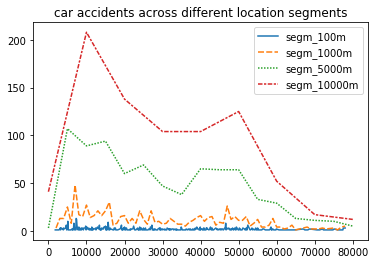

In [23]:
def plot_clusters(data, title):
    sns.lineplot(data=data, legend='full')
    plt.title(title)
    plt.plot()
    
plot_clusters(df_levels, 'car accidents across different location segments')
#plot_clusters(segm_1000m, '1000m level')
#plot_clusters(segm_10000m, '10000m level')
#plot_clusters(segm_100m, '100m level')
#plot_clusters(segm_5000m, '5000m level')


In [24]:
#segm_5000m

In [25]:
to_nan = ['--------', '-', '', '፳፷', '50/30', 'ወ']

crashes_final.driver_age = crashes_final.driver_age.apply(lambda x: np.nan if x in to_nan else x)
crashes_final.driver_age = crashes_final.driver_age.astype(float)

In [26]:
#crashes_final.describe()
#crashes_final.shape

In [27]:
#crashes_final.groupby(['accident_date']).agg({'driver_age': np.mean})
accident_count_daily = crashes_final.groupby(['accident_date']).count().max(axis=1)
# I use the max function to make sure the NAs in some columns are also counted as rows. 
# (There is no column with 0 NAs)

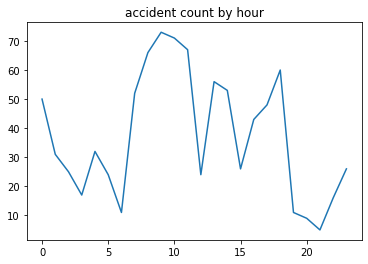

In [28]:
accident_count_hourly = crashes_final.groupby(['time_of_accident_hour']).count().max(axis=1)
sns.lineplot(data=accident_count_hourly)
plt.title('accident count by hour')
plt.show()
# careful: the hour is 3 hours ahead compared to 'accident_datetime'. Time zone?

## Traffic

In [29]:
traffic_final = pyreadr.read_r(data_path + traffic_path + final_traffic_file) # also works for RData
traffic_final = traffic_final[None]

In [30]:
traffic_final.head(3)

,plaza_id,trans_occur_time,car_license,veh_type,up_down,total_weight,distance,ent_plaza_id,ent_occur_time,time_on_road,speed_km_hr,entrance_km,exit_km,direction
0,102,2014-09-01 08:35:30,0x92AD56AB29E347D1779A07879D38C67A,2,0,0,16930,101,2014-08-31 10:07:42,1347.800000,NaN,2.0,2.0,to addis
1,102,2014-09-01 08:36:24,0x2CD713BB239103A0B783F539E3BEEF32,3,0,0,16930,101,2014-08-31 10:22:29,1333.916667,NaN,2.0,2.0,to addis
2,102,2014-09-01 08:37:21,0xBC6CE93C7F7B823BF30E9C741AFD5E1E,5,0,0,16930,101,2014-08-30 15:19:22,NaN,NaN,2.0,2.0,to addis


## Daily & Hourly Data:

In [31]:
hourly = pd.read_stata(data_path + 'Daily and Hourly Data/FinalData/hourly.dta')

In [32]:
daily = pd.read_stata(data_path + 'Daily and Hourly Data/FinalData/daily.dta')

In [33]:
hourly.head(2)

,date,date_hour,direction,N_crashes,N_vehicles,speed_mean,speed_p10,speed_p25,speed_p50,speed_p75,speed_p90,precip_mm,holiday,holiday_plusminus_1day,holiday_plusminus_2day,crash
0,2015-03-01,2015-03-01 23:00:00,to addis,0.0,33.0,78.858322,57.287540,66.767296,78.389728,91.929141,97.591059,0.0,0.0,1.0,1.0,NaN
1,2015-03-01,2015-03-02 04:00:00,to addis,0.0,25.0,79.953859,58.112585,61.454456,70.701581,83.633542,123.308209,0.0,0.0,1.0,1.0,NaN


In [38]:
daily.head(3)

,date,direction,N_crashes,N_vehicles,speed_mean,speed_p10,speed_p25,speed_p50,speed_p75,speed_p90,precip_mm,holiday,holiday_plusminus_1day,holiday_plusminus_2day,crash
0,2015-03-01,to addis,0.0,2102.0,85.295700,61.823531,72.101266,85.182857,97.545113,109.275504,0.0,0.0,1.0,1.0,NaN
1,2015-03-01,to adama,0.0,1457.0,81.541419,47.929713,61.907545,80.926316,96.433423,115.708284,0.0,0.0,1.0,1.0,NaN
2,2015-03-02,to addis,0.0,4264.0,85.790108,61.276734,71.798319,84.805913,98.558678,111.110871,0.0,1.0,1.0,1.0,NaN


We have daily and hourly data already. Location, however, is missing here. What we need is exactly this, but by location also.

## Segment data

Use it to add features at the end:

In [35]:
segment_data = pyreadr.read_r(data_path + 'Addis Adama Expressway/Data/segments_data/merged_data/aae_segment_data.Rds')
segment_data = segment_data[None]

In [36]:
segment_data.head()

,longitude,latitude,distance_from_addis,N_crashes,N_crashes_to_addis,N_crashes_to_adama,N_crashes_2015,N_crashes_2017,N_crashes_2016,N_crashes_to_addis_2015,N_crashes_to_adama_2017,N_crashes_to_addis_2017,N_crashes_to_addis_2016,N_crashes_to_adama_2016,N_crashes_to_adama_2015,dist_plaza_k2_km,dist_plaza_k16_km,dist_plaza_k33_km,dist_plaza_k52_km,dist_plaza_k60_km,dist_plaza_k64_km,dist_plaza_nearest_km,turnangle_10m,turnangle_50m,turnangle_100m,turnangle_250m,turnangle_500m,N_crashes_MA_sum_500m,N_crashes_to_addis_MA_sum_500m,N_crashes_to_adama_MA_sum_500m,N_crashes_2015_MA_sum_500m,N_crashes_2017_MA_sum_500m,N_crashes_2016_MA_sum_500m,N_crashes_to_addis_2015_MA_sum_500m,N_crashes_to_adama_2017_MA_sum_500m,N_crashes_to_addis_2017_MA_sum_500m,N_crashes_to_addis_2016_MA_sum_500m,N_crashes_to_adama_2016_MA_sum_500m,N_crashes_to_adama_2015_MA_sum_500m,N_crashes_MA_sum_1000m,N_crashes_to_addis_MA_sum_1000m,N_crashes_to_adama_MA_sum_1000m,N_crashes_2015_MA_sum_1000m,N_crashes_2017_MA_sum_1000m,N_crashes_2016_MA_sum_1000m,N_crashes_to_addis_2015_MA_sum_1000m,N_crashes_to_adama_2017_MA_sum_1000m,N_crashes_to_addis_2017_MA_sum_1000m,N_crashes_to_addis_2016_MA_sum_1000m,N_crashes_to_adama_2016_MA_sum_1000m,N_crashes_to_adama_2015_MA_sum_1000m,turnangle_10m_MA_mean_500m,turnangle_50m_MA_mean_500m,turnangle_100m_MA_mean_500m,turnangle_250m_MA_mean_500m,turnangle_500m_MA_mean_500m,turnangle_10m_MA_mean_1000m,turnangle_50m_MA_mean_1000m,turnangle_100m_MA_mean_1000m,turnangle_250m_MA_mean_1000m,turnangle_500m_MA_mean_1000m
0,38.817045,8.860382,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.99,15.99,32.99,51.99,59.99,63.99,1.99,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,38.817133,8.860405,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.98,15.98,32.98,51.98,59.98,63.98,1.98,0.000005,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,38.817220,8.860429,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.97,15.97,32.97,51.97,59.97,63.97,1.97,0.000005,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,38.817308,8.860452,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.96,15.96,32.96,51.96,59.96,63.96,1.96,2.251586,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,38.817396,8.860472,50.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.95,15.95,32.95,51.95,59.95,63.95,1.95,0.016425,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create location/time data

In [37]:
crashes_final.groupby(['accident_date', 'latitude', 'longitude']).count()

distance_from_addis  case_no  day  \
accident_date latitude longitude                                      
1900-06-27    8.624472 39.127748                    1        1    1   
              8.757343 39.013963                    1        1    1   
              8.837917 38.874580                    1        1    1   
2015-01-04    8.821391 38.907074                    1        1    1   
2015-01-05    8.623733 39.128540                    1        1    1   
2015-01-06    8.821456 38.907011                    1        1    1   
2015-01-09    8.775171 39.010203                    1        1    1   
2015-01-12    8.611237 39.138134                    1        1    1   
2015-01-14    8.587567 39.157984                    1        1    1   
2015-01-16    8.518126 39.219806                    1        1    1   
2015-01-17    8.671134 39.081230                    1        1    1   
              8.707894 39.051543                    1        1    1   
2015-01-18    8.801035 38.984333                    1        1    1   
2015-01-19    8.783433 39.006241                    1        1    1   
2015-01-25    8.665075 39.088635                    1        1    1   
2015-01-29    8.714094 39.046301                    1        1    1   
              8.841028 38.870257                    1        1    1   
2015-01-30    8.586762 39.160667                    2        2    2   
              8.587206 39.159197                    1        1    1   
2015-02-04    8.607223 39.140187                    1        1    1   
              8.816535 38.916405                    1        1    1   
2015-02-06    8.671444 39.080902                    1        1    1   
2015-02-08    8.670039 39.082430                    1        1    1   
2015-02-09    8.644541 39.104408                    1        1    1   
2015-02-11    8.516100 39.221860                    1        1    1   
2015-02-12    8.512032 39.234901                    1        1    1   
2015-02-19    8.586762 39.160667                    1        1    1   
2015-03-03    8.841272 38.869878                    1        1    1   
2015-03-04    8.798039 38.992661                    1        1    1   
2015-03-10    8.503584 39.262788                    1        1    1   
              8.753453 39.014780                    1        1    1   
2015-03-11    8.810306 38.959837                    1        1    1   
2015-03-14    8.752749 39.014944                    1        1    1   
2015-03-19    8.828946 38.899089                    1        1    1   
2015-03-20    8.620118 39.131935                    1        1    1   
2015-03-22    8.504912 39.286024                    1        1    1   
2015-03-27    8.512835 39.295207                    1        1    1   
2015-03-28    8.514876 39.296377                    1        1    1   
2015-03-29    8.861029 38.832508                    1        1    1   
2015-03-31    8.586762 39.160667                    1        1    1   
              8.721040 39.041583                    1        1    1   
              8.815289 38.947309                    1        1    1   
2015-04-03    8.603332 39.141639                    1        1    1   
2015-04-04    8.836143 38.877192                    1        1    1   
2015-04-05    8.787258 39.003519                    1        1    1   
2015-04-08    8.816938 38.918993                    1        1    1   
2015-04-10    8.607714 39.139958                    1        1    1   
              8.827868 38.900530                    1        1    1   
2015-04-11    8.586641 39.161007                    1        1    1   
              8.827221 38.901284                    1        1    1   
2015-04-12    8.829762 38.897682                    1        1    1   
2015-04-13    8.611853 39.137757                    1        1    1   
2015-04-17    8.784783 39.005335                    1        1    1   
2015-04-18    8.586762 39.160667                    1        1    1   
              8.833864 38.886997                    1     